<a href="https://colab.research.google.com/github/tienhoang87/project/blob/main/Google_Playstore_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?





### Session 1 - Introduction to Data Visualisation

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read the dataset and check the first five rows
path=r'/content/drive/MyDrive/bản copy media mới/Bản sao của googleplaystore_v2.csv'
df =pd.read_csv(path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Handling and Cleaning



The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before I proceed to the analysis stage.




In [5]:
#Check the datatypes of all the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment


In [6]:
#Check the number of null values in the columns Kiểm tra số lượng giá trị null trong các cột
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records



In [7]:
#Check the percentage of null values for each column in total.
percent_null=df.isnull().sum()/len(df)*100
percent_null

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [8]:
#Drop the rows having null values in the Rating field
df.dropna(subset='Rating',inplace=True)
#Check the shape of the dataframe
df.shape

(9367, 13)

In [9]:
# Check the number of nulls in the Rating field again to cross-verify
df.Rating.isnull().sum()


0

In [11]:

#Check the number of nulls in the dataframe again and find the total number of null values
print(df.isnull().sum())
print('total nulls:',df.isnull().sum().sum() )

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64
total nulls: 8


In [12]:
#Inspect the nulls in the Android Version column
df[(df['Android Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
#Drop the row having shifted values
df.drop(axis=0,index=10472,inplace=True)



In [14]:
#Check the nulls againin Android version column to cross-verify
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64


Imputing Missing Values



In [15]:
#Check the most common value in the Android version column
common=df['Android Ver'].mode()
common

0    4.1 and up
Name: Android Ver, dtype: object

In [16]:
#Fill up the nulls in the Android Version column with the above value
df['Android Ver'].fillna('4.1 and up',inplace=True)

In [17]:
#Check the nulls in the Android version column again to cross-verify
df['Android Ver'].isnull().sum()

0

In [18]:
#Check the nulls in the entire dataframe again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
#Check the most common value in the Current version column
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [20]:
#Replace the nulls in the Current version column with the above value
df['Current Ver'].fillna('Varies with device',inplace=True)
df['Current Ver'].isnull().sum()

0

In [21]:
#Check the most common value in the Current version column again
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [23]:
#Check for null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


Handling Incorrect Data Types




In [24]:
#Check the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [26]:
#Try calculating the average price of all apps having the Android version as "4.1 and up"

df[df['Android Ver'] =='4.1 and up']['Price'].mean()

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$1.49$0.9900$0.990$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000 to numeric

In [27]:
#Analyse the Price column to check the issue
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [28]:
#Write the function to make the changes

df['Price']=df['Price'].str.replace('$','')

In [29]:
#Verify the dtype of Price once again
df['Price'].dtype

dtype('O')

In [30]:
df['Price']=pd.to_numeric(df['Price'])
df['Price'].dtype

dtype('float64')

In [31]:
#calculating the average price of all apps having the Android version as "4.1 and up"
df[df['Android Ver'] =='4.1 and up']['Price'].mean()

0.8191606016496848

In [32]:
#Analyse the Reviews column
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [33]:
#Change the dtype of this column

df['Reviews']=pd.to_numeric(df['Reviews'])
df['Reviews'].dtype
#Check the quantitative spread of this dataframe
df.describe()


,Rating,Reviews,Size,Price
count,9366.000000,9.366000e+03,9366.000000,9366.000000
mean,4.191757,5.140498e+05,22705.733753,0.960928
std,0.515219,3.144042e+06,21305.040123,15.816585
min,1.000000,1.000000e+00,8.500000,0.000000
25%,4.000000,1.862500e+02,6600.000000,0.000000
50%,4.300000,5.930500e+03,21000.000000,0.000000
75%,4.500000,8.153275e+04,27000.000000,0.000000
max,5.000000,7.815831e+07,100000.000000,400.000000


In [34]:
#Analyse the Installs Column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [35]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [36]:
df['Installs']=df['Installs'].str.replace('+','')

In [37]:
df['Installs']=df['Installs'].str.replace(',','')

In [38]:
df['Installs']=pd.to_numeric(df['Installs'])

In [39]:
df['Installs'].dtype

dtype('int64')

In [42]:
#Clean the Installs Column and find the approximate number of apps at the 50th percentile.
median_installs=df['Installs'].quantile(0.5)
median_installs

500000.0

#### Sanity Checks

The data that I have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [43]:
df['Rating'].dtype

dtype('float64')

In [44]:
df[(df['Rating']<1) | (df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
df=df[(df['Reviews'])<=(df['Installs'])]
df
df[(df['Reviews'])>(df['Installs'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#perform the sanity checks on prices of free apps
df[(df['Type']=='Free') & (df['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

In [46]:
#import the plotting libraries

import matplotlib.pyplot as plt
%matplotlib inline

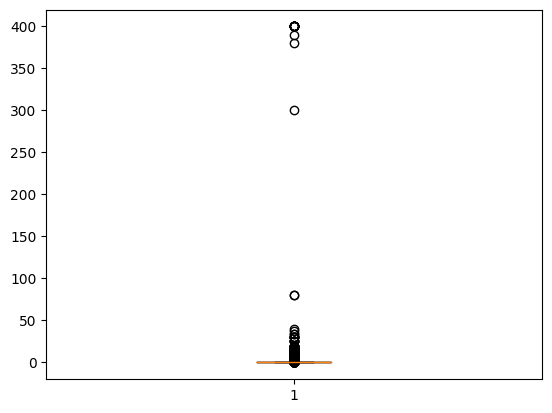

In [47]:
#Create a box plot for the price column
plt.boxplot(df.Price)
plt.show()

In [48]:
#Check the apps with price more than 200
len(df[df.Price<200])

9344

In [49]:
df=df[df.Price<200]

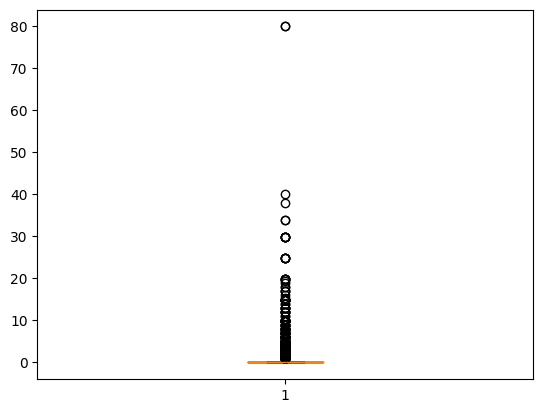

In [50]:
plt.boxplot(df.Price)
plt.show()

In [51]:
#Check the apps with price more than 20
len(df[df.Price<20])

9327

In [52]:
df=df[df.Price<20]

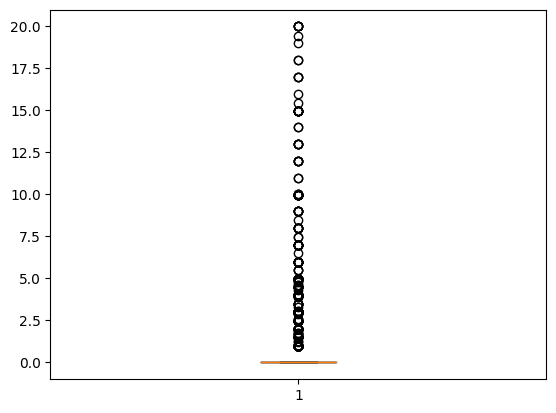

In [53]:

plt.boxplot(df.Price)
plt.show()

In [54]:
df.Price.describe()

count    9327.000000
mean        0.269582
std         1.377295
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.990000
Name: Price, dtype: float64

In [55]:
len(df[df.Price==0])

8715

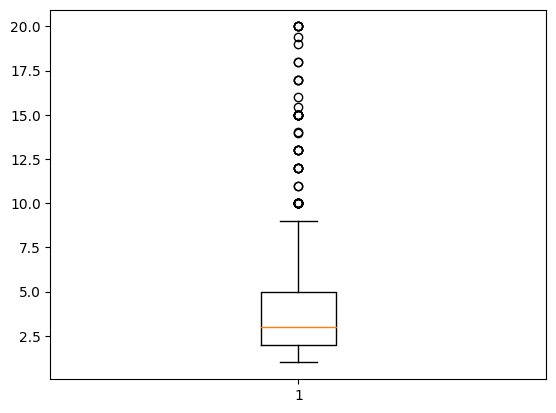

In [56]:
plt.boxplot(df[df.Price>0]['Price'])
plt.show()

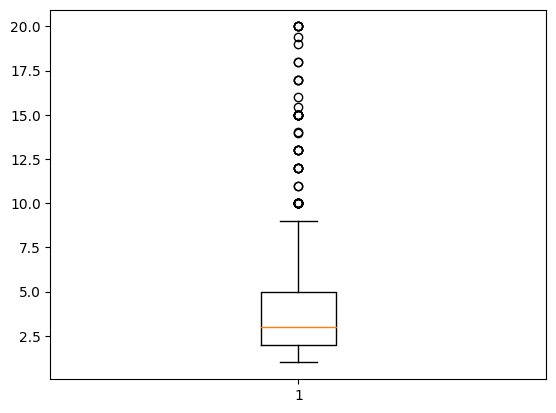

In [58]:
#Create a box plot for paid apps
plt.boxplot(df[(df.Price>0)&(df.Price<20)]['Price'])
plt.show()

In [59]:
#Clean the Price column again
df=df[df.Price<20]

### Histograms




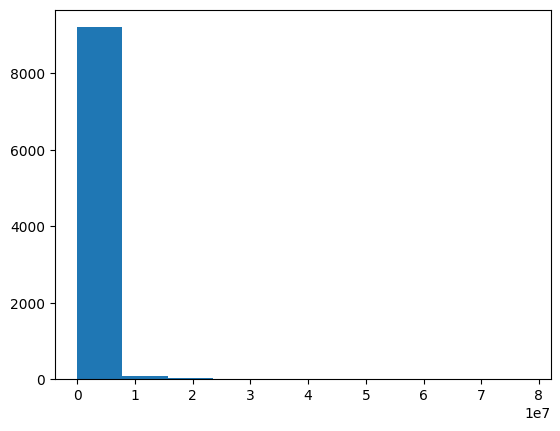

In [60]:
#Create a histogram of the Reviews
plt.hist(df.Reviews)
plt.show()

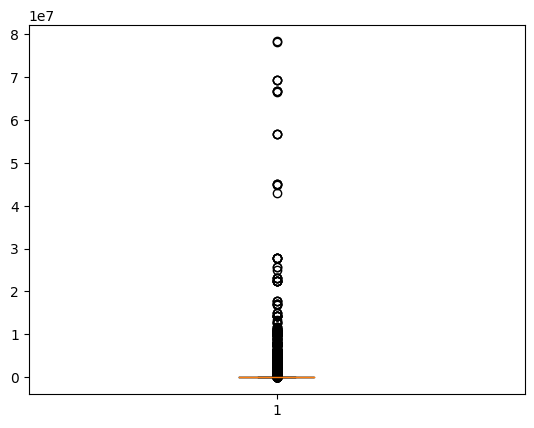

In [61]:
#Create a boxplot of the Reviews column

plt.boxplot(df.Reviews)
plt.show()

In [62]:
#Check records with 1 million reviews
df[df.Reviews>1000000].shape

(704, 13)

In [63]:
df[df.Reviews>2000000].shape

(453, 13)

In [64]:
#Drop the above records
df=df[df.Reviews<=1000000]


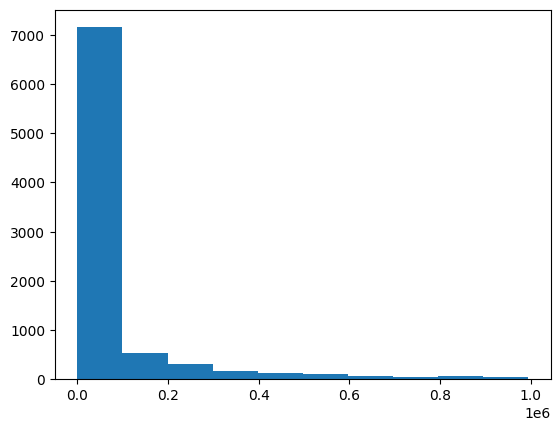

In [65]:
#Create a histogram again and check the peaks
plt.hist(df.Reviews)
plt.show()

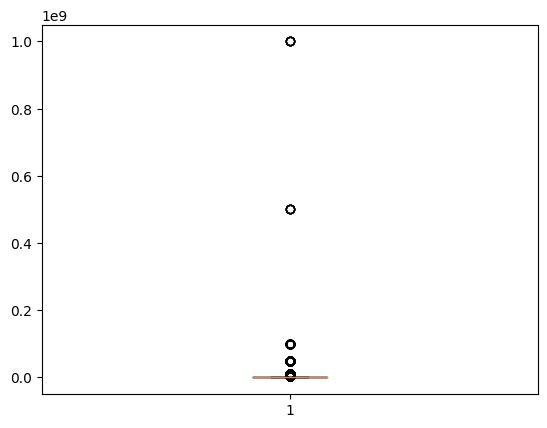

In [66]:
#Create a box plot for the Installs column and report back the IQR
plt.boxplot(df.Installs)
plt.show()



In [67]:
#CLean the Installs by removing all the apps having more than or equal to 100 million installs
df[df.Installs>100000000].shape
df=df[df.Installs<=100000000]

<function matplotlib.pyplot.show(close=None, block=None)>

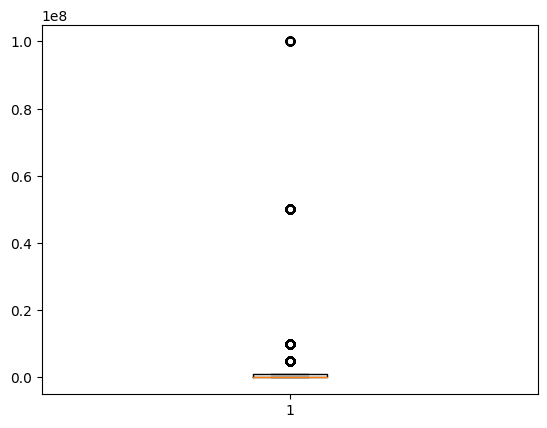

In [68]:
plt.boxplot(df.Installs)
plt.show

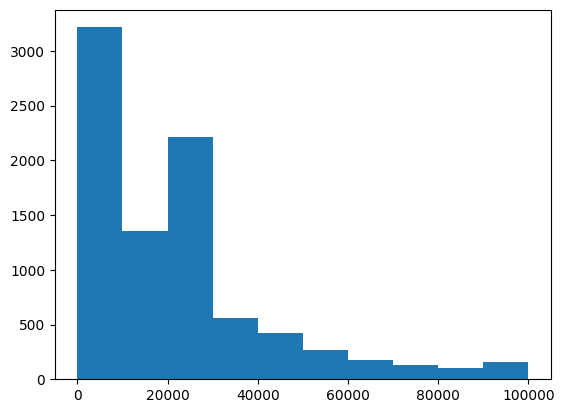

In [69]:
#Plot a histogram for Size as well.
plt.hist(df.Size)
plt.show()

In [ ]:
#Create a boxplot for the Size column and report back the median value

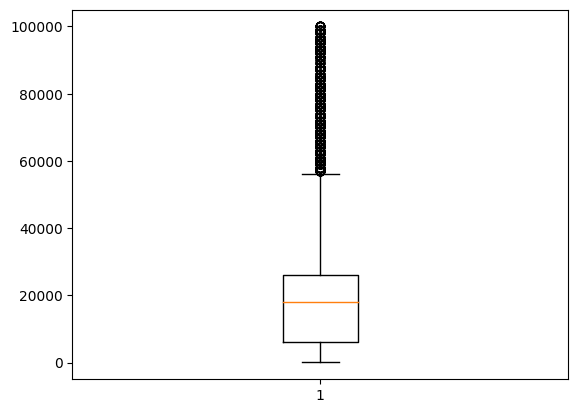

In [70]:
plt.boxplot(df.Size)
plt.show()

In [71]:
df.Size.median()

18000.0

### Session 2 - Data Visualisation with Seaborn

In [72]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Distribution Plots

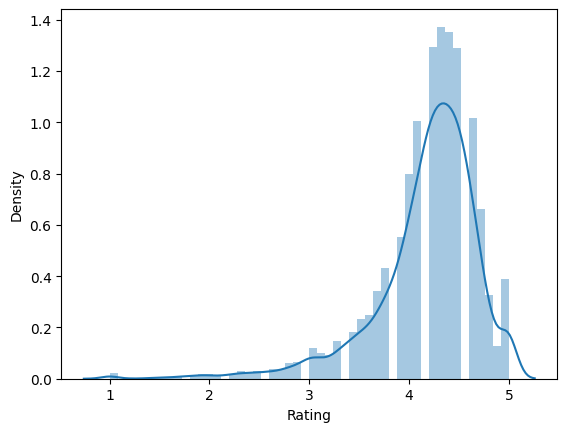

In [73]:
#Create a distribution plot for rating
sns.distplot(df.Rating)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

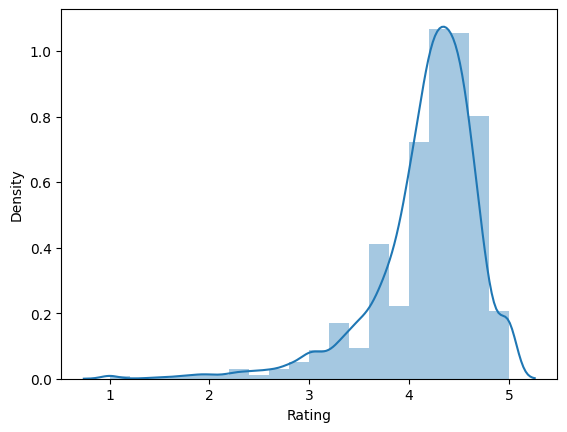

In [74]:
#Change the number of bins
sns.distplot(df.Rating, bins=20)
plt.show

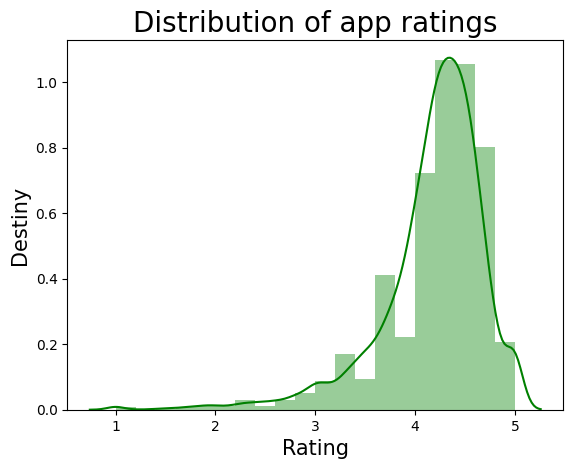

In [75]:
sns.distplot(df.Rating,bins=20,color='g')
plt.title("Distribution of app ratings",fontsize=20)
plt.xlabel(xlabel='Rating',fontsize=15)
plt.ylabel(ylabel='Destiny',fontsize=15)
plt.show()

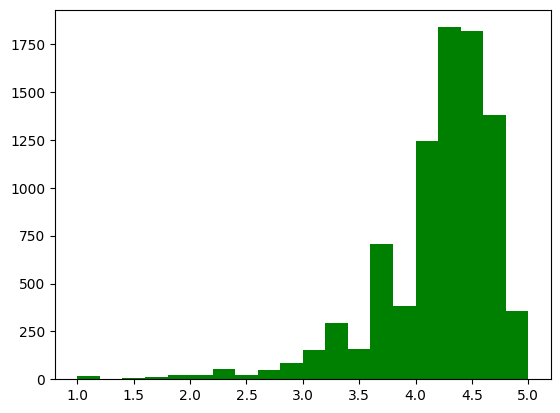

In [76]:
#Apply matplotlib functionalities Create a hist
plt.hist(df.Rating,bins=20, color='g')
plt.show()

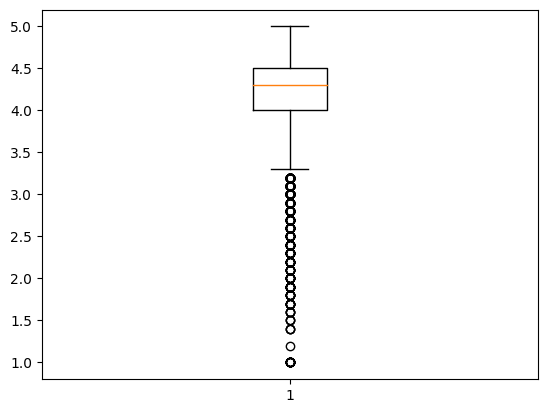

In [ ]:
#Create a boxplot
plt.boxplot(df.Rating)
plt.show()

#### Styling Options



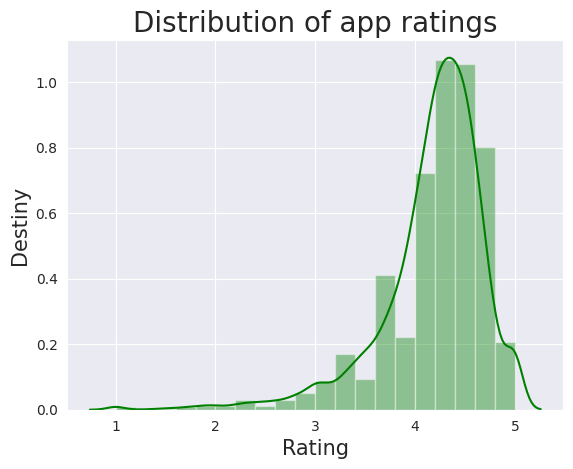

In [ ]:
#Check all the styling options
sns.set_style('darkgrid')
sns.distplot(df.Rating,bins=20,color='g')
plt.title("Distribution of app ratings",fontsize=20)
plt.xlabel(xlabel='Rating',fontsize=15)
plt.ylabel(ylabel='Destiny',fontsize=15)
plt.show()

#### Pie-Chart and Bar Chart

In [77]:
#Analyse the Content Rating column
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [78]:
#Remove the rows with values which are less represented
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [79]:
df['Content Rating'].value_counts()

Content Rating
Everyone           6928
Teen                928
Mature 17+          416
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [80]:
df.reset_index(inplace=True)

In [82]:
#Reset the index
table=pd.pivot_table(df,values='index',index='Content Rating',aggfunc='count').reset_index()


In [83]:
#Check the apps belonging to different categories of Content Rating
table

,Content Rating,index
0,Adults only 18+,3
1,Everyone,6928
2,Everyone 10+,337
3,Mature 17+,416
4,Teen,928
5,Unrated,1


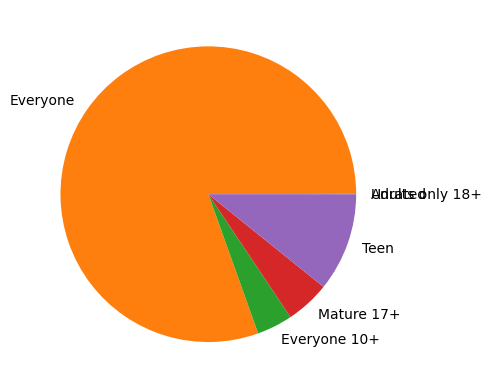

In [84]:
#Plot a pie chart
plt.pie(table['index'],labels=table['Content Rating'])
plt.show()

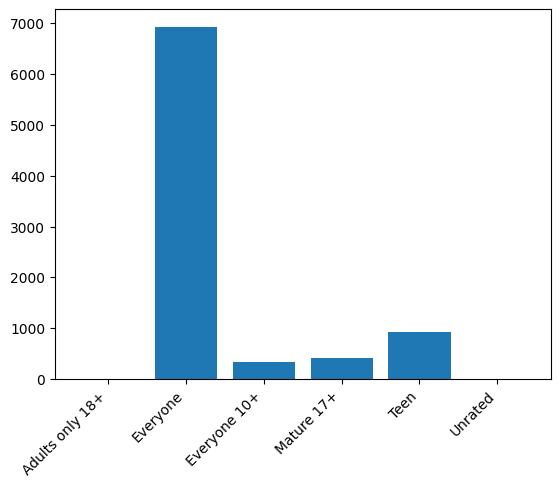

In [85]:
#Plot a bar chart
plt.bar(table['Content Rating'],table['index'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [86]:
#Question - Plot a bar plot for checking the 4th highest Android version type
board=pd.pivot_table(df,values='index',index='Android Ver',aggfunc='count').reset_index()
board

,Android Ver,index
0,1.0 and up,2
1,1.5 and up,16
2,1.6 and up,86
3,2.0 and up,27
4,2.0.1 and up,6
5,2.1 and up,110
6,2.2 and up,206
7,2.3 and up,559
8,2.3.3 and up,233
9,3.0 and up,205


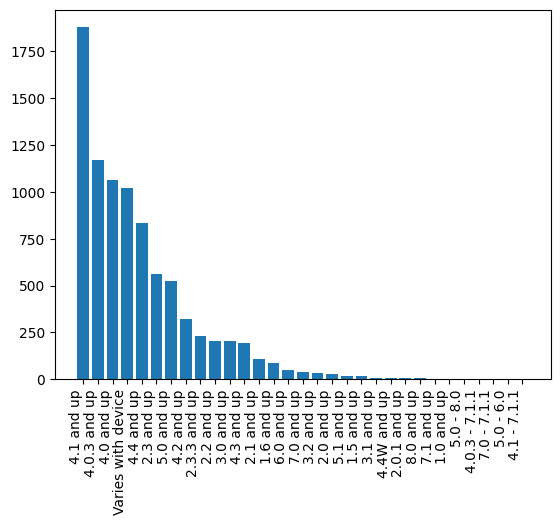

In [87]:
board=pd.pivot_table(df,values='index',index='Android Ver', aggfunc='count').reset_index().sort_values('index',ascending=False)
plt.bar(board['Android Ver'],board['index'])
plt.xticks(rotation=90,ha='right')
plt.show()

#### Scatter Plots

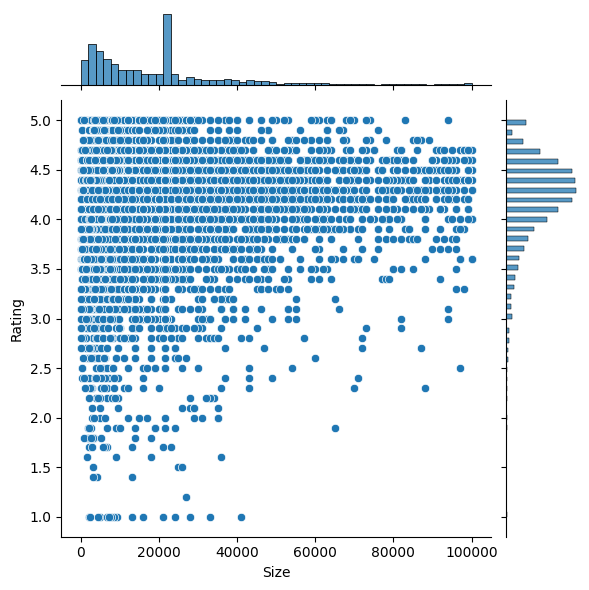

In [88]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
sns.jointplot(x=df['Size'],y=df['Rating'])
plt.show()

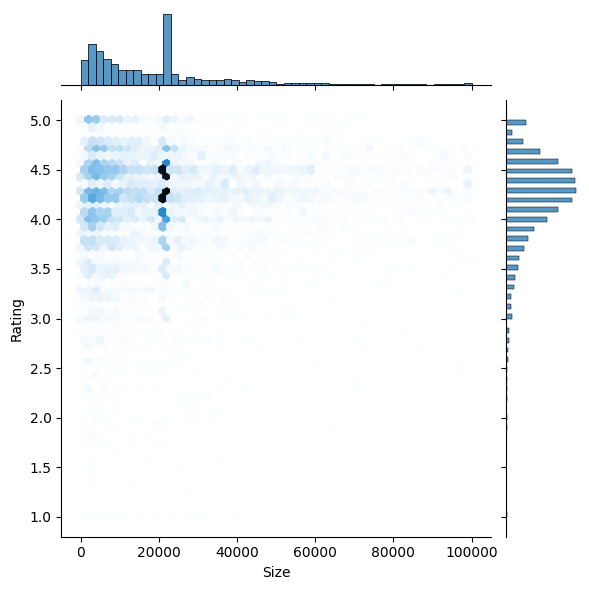

In [89]:
### Plot the same thing now using a jointplot
sns.jointplot(x=df['Size'],y=df['Rating'],kind='hex')
plt.show()

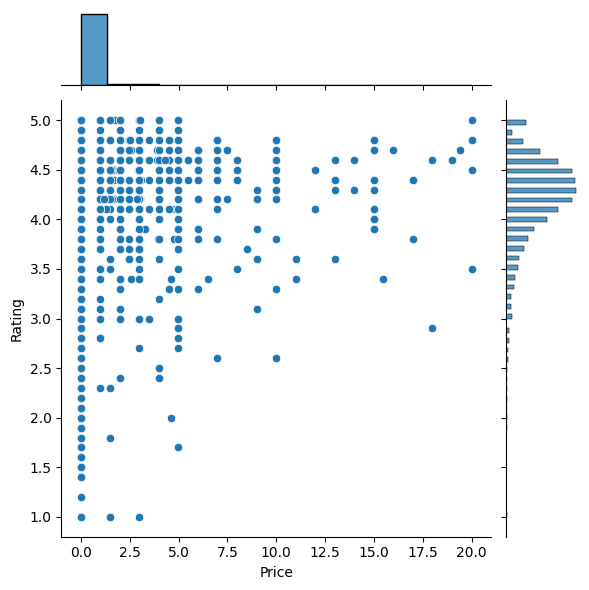

In [90]:
## Plot a jointplot for Price and Rating
sns.jointplot(x=df['Price'],y=df['Rating'])
plt.show()

**Reg Plots**



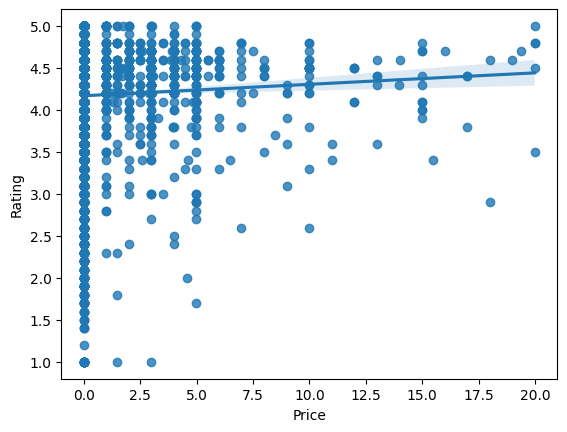

In [91]:
##Plot a reg plot for Price and Rating and observe the trend

sns.regplot(x=df['Price'],y=df['Rating'])
plt.show()

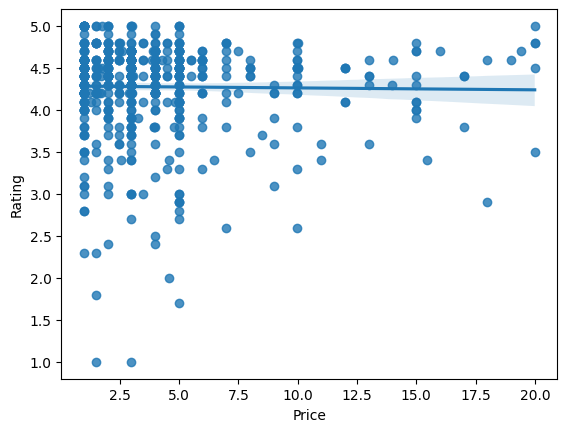

In [92]:
## Plot a reg plot for Price and Rating again for only the paid apps.
sns.regplot(x=df[df['Type']=='Paid']['Price'],y=df[df['Type']=='Paid']['Rating'])
plt.show()

**Pair Plots**

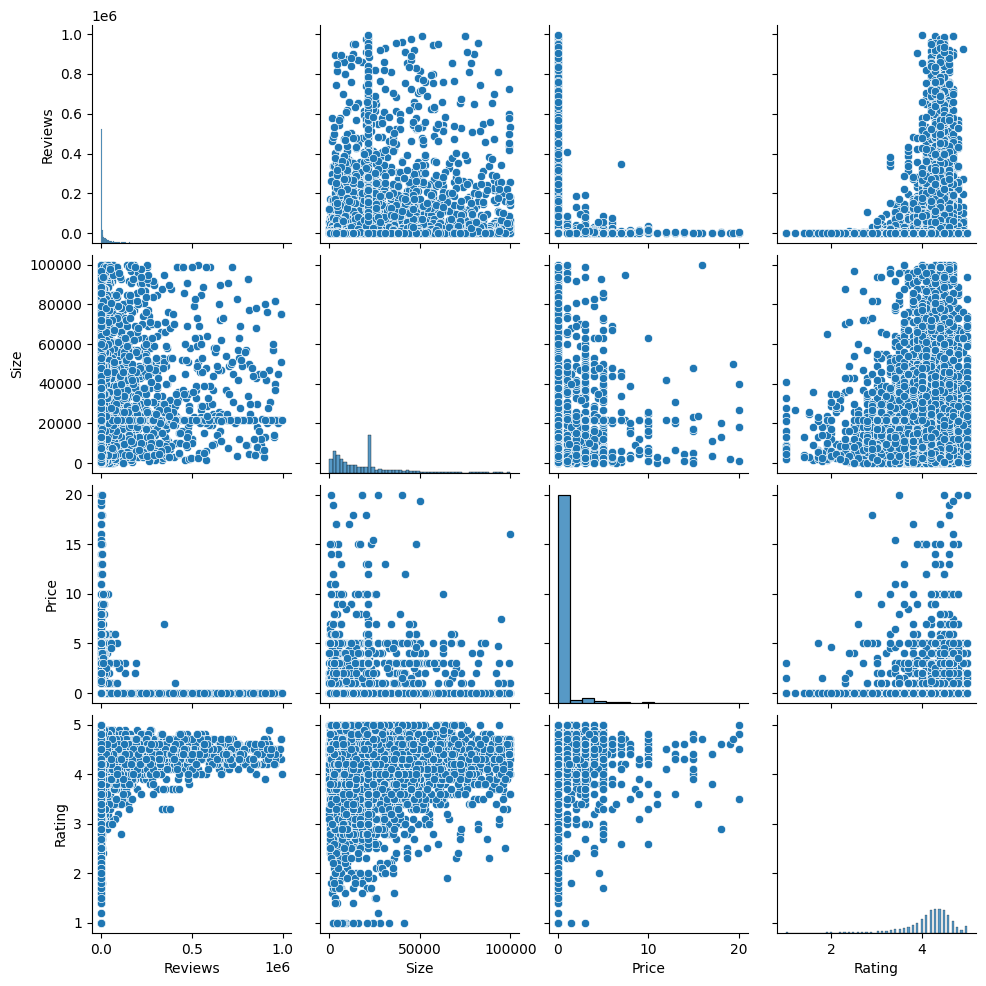

In [93]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(df[['Reviews','Size','Price','Rating']])

**Bar Charts Revisited**

<function matplotlib.pyplot.show(close=None, block=None)>

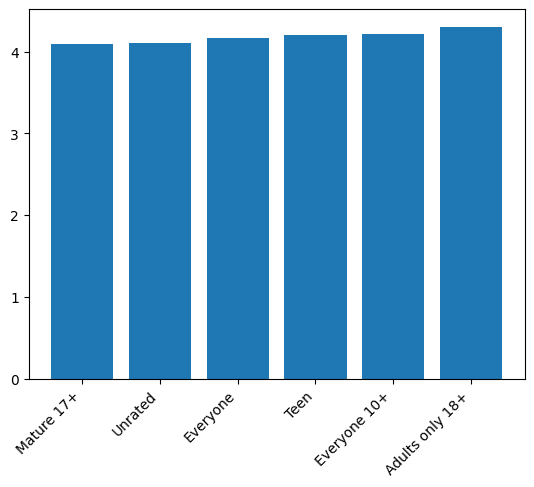

In [94]:
##Plot a bar plot of Content Rating vs Average Rating
tb=pd.pivot_table(df,values='Rating',index=['Content Rating'], aggfunc = np.average).reset_index().sort_values("Rating")
plt.bar(tb['Content Rating'],tb['Rating'])
plt.xticks(rotation=45,ha='right')
plt.show

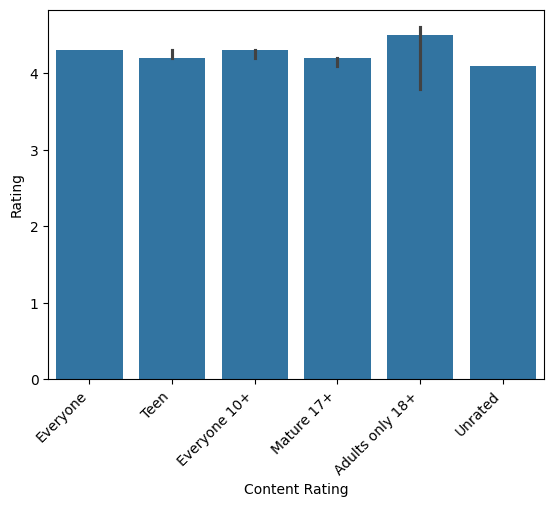

In [95]:
##Plot the bar plot again with Median Rating
sns.barplot(x='Content Rating',y='Rating',data=df,estimator=np.median)
plt.xticks(rotation=45,ha='right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

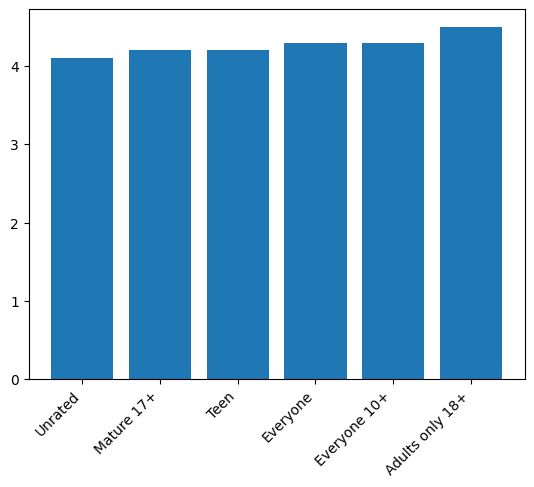

In [96]:
tb=pd.pivot_table(df,values='Rating',index=['Content Rating'], aggfunc = np.median).reset_index().sort_values("Rating")
plt.bar(tb['Content Rating'],tb['Rating'])
plt.xticks(rotation=45,ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

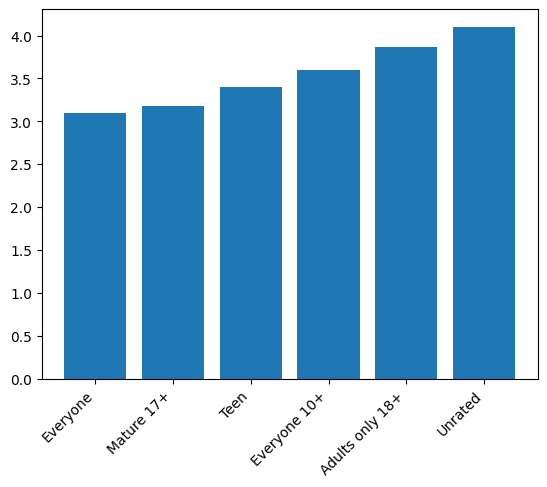

In [97]:
##Plot the bar plot with only the 5th percentile of Ratings
tb=pd.pivot_table(df,values='Rating',index=['Content Rating'], aggfunc = lambda x: np.percentile(x,5)).reset_index().sort_values("Rating")
plt.bar(tb['Content Rating'],tb['Rating'])
plt.xticks(rotation=45,ha='right')
plt.show

In [98]:
np.percentile(df['Rating'],q=5)

3.1

## Plot the bar plot with the minimum Rating


<function matplotlib.pyplot.show(close=None, block=None)>

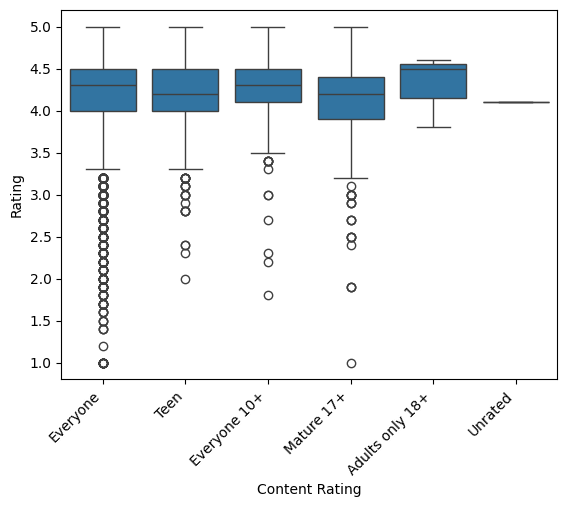

In [101]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(data=df,y="Rating",x="Content Rating")
plt.xticks(rotation=45,ha='right')
plt.show

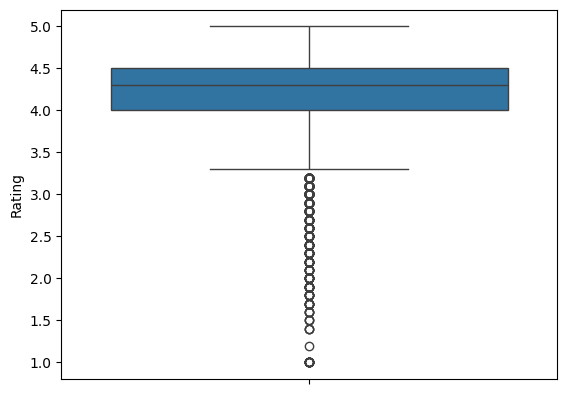

In [103]:
## Plot a box plot for the Rating column only
sns.boxplot(data=df,y='Rating')
plt.show()

In [104]:
df['Genres'].value_counts()

Genres
Tools                     695
Entertainment             508
Education                 463
Medical                   335
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: count, Length: 115, dtype: int64

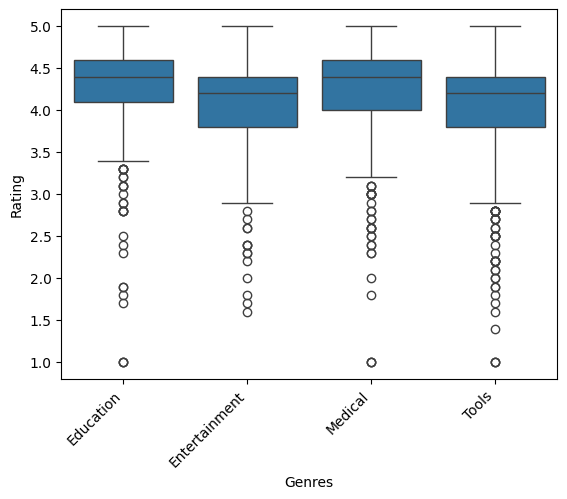

In [105]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
sns.boxplot(data=df[df['Genres'].isin(['Tools','Entertainment','Education','Medical'])],y='Rating',x='Genres')
plt.xticks(rotation=45,ha='right')
plt.show()

#### Heat Maps

In [106]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

df['Size_Bucket'] = pd.qcut(df.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])
df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL
8609,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH
8610,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL
8611,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M


In [107]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
tb=pd.pivot_table(data=df, index="Content Rating", columns="Size_Bucket", values="Rating",aggfunc='sum')

In [108]:
##Change the aggregation to 20th percentile
tb=pd.pivot_table(data=df, index="Content Rating", columns="Size_Bucket", values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

In [109]:
##Store the pivot table in a separate variable
tb

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Adults only 18+,NaN,4.60,3.8,NaN,4.5
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0
Unrated,NaN,4.10,NaN,NaN,NaN


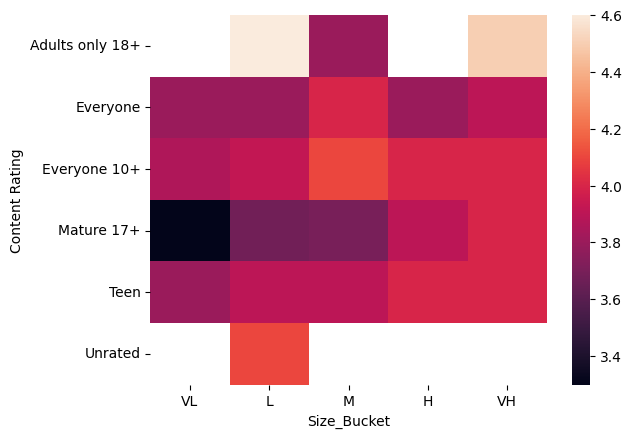

In [110]:
##Plot a heat map
sns.heatmap(tb)
plt.show()

### Session 3: Additional Visualisations

#### Line Plots

In [112]:
df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [113]:
## Extract the month from the Last Updated Date
df['Month']=pd.to_datetime(df['Last Updated']).dt.month


In [114]:
## Find the average Rating across all the months

df.groupby('Month')['Rating'].mean()

Month
1     4.141728
2     4.090408
3     4.107963
4     4.148326
5     4.152070
6     4.172590
7     4.223282
8     4.270823
9     4.041406
10    4.016667
11    4.102685
12    4.064526
Name: Rating, dtype: float64

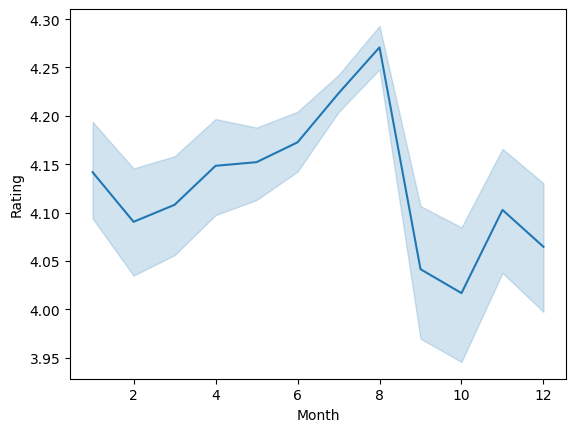

In [124]:
## Plot a line graph

sns.lineplot(x='Month',y='Rating',data=df)
plt.show()

#### Stacked Bar Charts

In [116]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
df.groupby(['Content Rating','Month'])['Installs'].sum().reset_index()

,Content Rating,Month,Installs
0,Adults only 18+,7,1500000
1,Adults only 18+,8,500000
2,Everyone,1,925387390
3,Everyone,2,545372005
4,Everyone,3,695365520
5,Everyone,4,973371180
6,Everyone,5,1860767800
7,Everyone,6,2427170505
8,Everyone,7,7771059680
9,Everyone,8,5930923320


In [117]:
##Store the table in a separate variable
tb=df.groupby(['Content Rating','Month'])['Installs'].sum().reset_index()

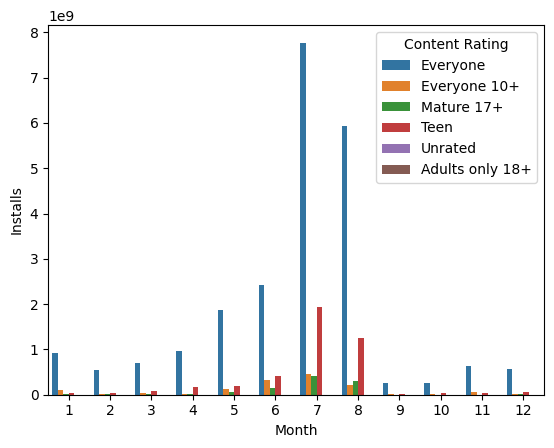

In [118]:
##Plot the stacked bar chart.
sns.barplot(x='Month',y='Installs',hue='Content Rating',data=tb)
plt.show()

#### Plotly

In [123]:
!pip install plotly

In [128]:
#Take the table you want to plot in a separate variable
res = df.groupby(['Month'])[['Rating']].mean()
res.reset_index(inplace=True)

In [129]:
#Import the plotly libraries
import plotly.express as px

In [130]:
#Prepare the plot
fig = px.line(res, x='Month',y="Rating",title="Montly average rating")
fig.show()